<a href="https://colab.research.google.com/github/dkaratzas/ML2024-25/blob/main/Session%208%20-%20SVMs/P8_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open in SageMaker Studio Lab](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/dkaratzas/ML2024-25/blob/main/Session%208%20-%20SVMs/P8_SVM.ipynb>)

# Problems 8 - SVM Classification

In this practical exercise we will use the sklearn library to explore SVMs and then try different classifiers we have learnt on the same dataset, and compare performance.

## 8.1 Exploring SVMs

We will first explore SVMs in a simple 2D scenario. The code below is based on code by Gaël Varoquaux, licensed under "BSD 3 clause".

First, create a 2D dataset with 16 samples and two classes, and plot our data

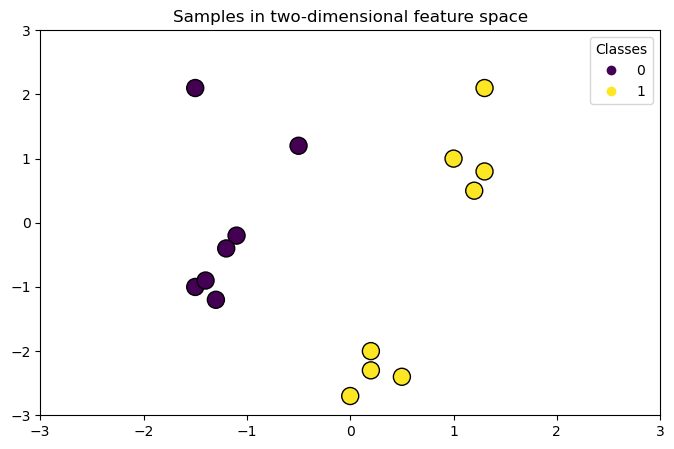

In [1]:
import matplotlib.pyplot as plt
import numpy as np

X = np.array(
    [
        [-1.5, -1.0],
        [-1.4, -0.9],
        [-1.3, -1.2],
        [-1.1, -0.2],
        [-1.2, -0.4],
        [-0.5, 1.2],
        [-1.5, 2.1],
        [1.0, 1.0],
        [1.3, 0.8],
        [1.2, 0.5],
        [0.2, -2.0],
        [0.5, -2.4],
        [0.2, -2.3],
        [0.0, -2.7],
        [1.3, 2.1],
    ]
)

y = np.array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

# Plotting settings
plt.figure(figsize = (8, 5) )
x_min, x_max, y_min, y_max = -3, 3, -3, 3
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# Plot samples by color and add legend
scatter = plt.scatter(X[:, 0], X[:, 1], s=150, c=y, label=y, edgecolors="k")
plt.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
plt.title("Samples in two-dimensional feature space")
plt.show()

### 8.1.1 - The Linear Support Vector Classifier

To fit an Support Vector Classifier we can use the [SVC model](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) of the `sklearn` library. It exposes the usual `fit()` and `predict()` functions for this purpose. We will start with a simple linear classifier

The linear kernel is just the dot product of the input samples:

$$K(\mathbf{x_1}, \mathbf{x_2})=\mathbf{x_1^T x_2}$$

The dot product of the two points determines the [cosine_similarity](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html#sklearn.metrics.pairwise.cosine_similarity) between both points. The higher the value, the more similar the points are.

In [2]:
from sklearn import svm

clf = svm.SVC(kernel = "linear") # Define an SMV classifier with a linear kernel
clf.fit(X, y) # Train your model

clf.predict(X) # Evaluate on the training set

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [3]:
clf.support_vectors_

array([[-0.5,  1.2],
       [ 1. ,  1. ],
       [ 0. , -2.7]])

If the model is linear, we can use the coefficients and intercept (bias) of the model to calculate the models output directly, for the support vectors, it should give us 1 or -1

In [4]:
clf.support_vectors_ @ clf.coef_.T + clf.intercept_

array([[-0.99986825],
       [ 1.00013169],
       [ 0.99973665]])

We can also ask for the dual coefficients $a_i$, that apply to each of the support vectors (for the rest of the samples they would be equal to zero). These are returned multiplied by the corresponding targets $y_i$ (1 or -1), and should sum to $0$

$$\sum_{i=0}^m{y_ia_i\mathbf{x_i}}=0$$

In [5]:
clf.dual_coef_

array([[-0.88861093,  0.84266475,  0.04594617]])

We define below a function that fits a [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) classifier, allowing the `kernel` parameter as an input, and then plots the decision boundaries learned by the model using [DecisionBoundaryDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html#sklearn.inspection.DecisionBoundaryDisplay).

We can pass to this function different values for meta-parameters of the algorithm. All kernels have a `C` parameter that controls the regularisation level, while different kernels have extra parameters specific to the kernels, like `gamma` and `degrees`. These are set to default values (`gamma=2`, `degrees=3`), but are anyway ignored by kernels that do not use them, like the linear kernel.

In a real classification task, where performance matters, parameter tuning (by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) for instance) is highly recommended to capture different structures within the data.

Setting `response_method="predict"` in DecisionBoundaryDisplay colors the areas based on their predicted class. Using `response_method="decision_function"` allows us to also plot the decision boundary and the margins to both sides of it. Finally the support vectors used during training (which always lay on the margins) are identified by means of the `support_vectors_` attribute of the trained SVCs, and plotted as well.

In [6]:
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay


def plot_training_data_with_decision_boundary(kernel, C = 1, gamma = 2, degree = 3):
    # Train the SVC
    clf = svm.SVC(kernel=kernel, C = C, gamma=gamma, degree = degree).fit(X, y)

    # Settings for plotting
    plt.figure(figsize=(8, 5))
    x_min, x_max, y_min, y_max = -3, 3, -3, 3
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    # Plot decision boundary and margins
    common_params = {"estimator": clf, "X": X, "ax": plt.gca()}
    
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.3,
    )
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="decision_function",
        plot_method="contour",
        levels=[-1, 0, 1],
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"]
    )

    # Plot bigger circles around samples that serve as support vectors
    plt.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=250,
        facecolors="none",
        edgecolors="k"
    )
    
    # Plot samples by color and add legend
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=150, edgecolors="k")
    plt.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
    plt.title(f" Decision boundaries of {kernel} kernel in SVC")
    plt.show()

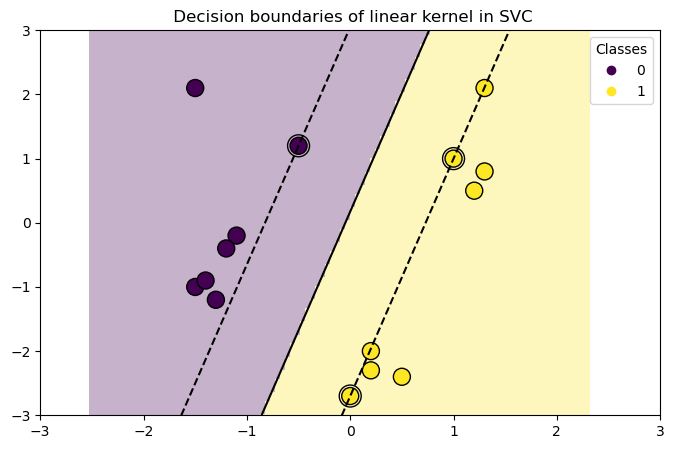

In [7]:
plot_training_data_with_decision_boundary("linear")

### 8.1.2 - A more difficult dataset and regularisation

Now, let's complicate things a bit, we will add one more point in our dataset, to make it difficult to solve with a linear classifier

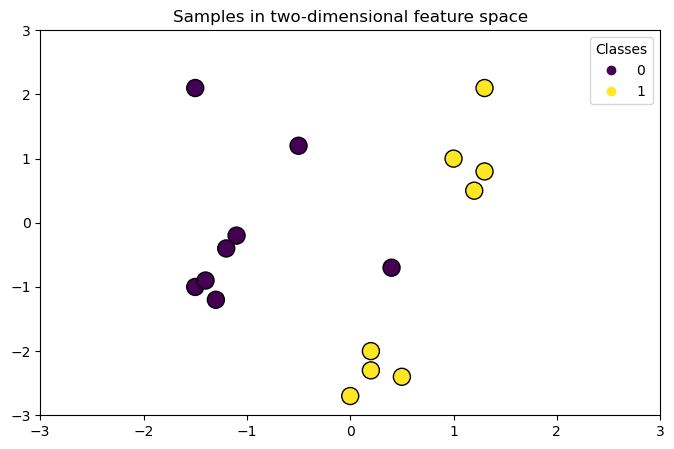

In [8]:
import matplotlib.pyplot as plt
import numpy as np

X = np.array(
    [
        [0.4, -0.7], # This is the new point we added
        [-1.5, -1.0],
        [-1.4, -0.9],
        [-1.3, -1.2],
        [-1.1, -0.2],
        [-1.2, -0.4],
        [-0.5, 1.2],
        [-1.5, 2.1],
        [1.0, 1.0],
        [1.3, 0.8],
        [1.2, 0.5],
        [0.2, -2.0],
        [0.5, -2.4],
        [0.2, -2.3],
        [0.0, -2.7],
        [1.3, 2.1],
    ]
)

y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

# Plotting settings
plt.figure(figsize = (8, 5) )
x_min, x_max, y_min, y_max = -3, 3, -3, 3
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# Plot samples by color and add legend
scatter = plt.scatter(X[:, 0], X[:, 1], s=150, c=y, label=y, edgecolors="k")
plt.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
plt.title("Samples in two-dimensional feature space")
plt.show()

Let's try a linear kernel again, remember that the default value we use for the SVC parameter `C` is $1$

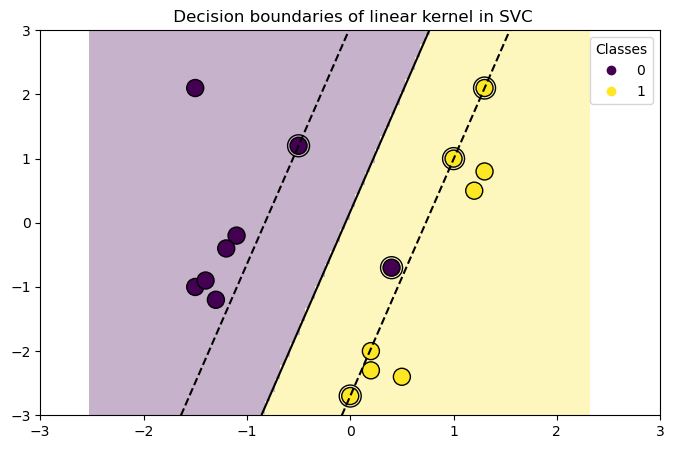

In [9]:
plot_training_data_with_decision_boundary("linear")

<font color=blue>Try different values for `C` and try to explain what is happening in each scenario</font>

In [10]:
# Your Code Here



---

*Your Answer Here*

---

### 8.1.3 - Non linear kernels: Polynomial

The polynomial kernel changes the notion of similarity. The kernel function is defined as:

$$K(\mathbf{x_1},\mathbf{x_2})=(\gamma \cdot \mathbf{x_1}^T \mathbf{x_2} + r)^d$$

where $d$ is the degree (`degree`) of the polynomial, $\gamma$ (`gamma`) controls the influence of each individual training sample on the decision boundary and 
$r$ is the bias term (`coef0`) that shifts the data up or down. Here, we use the default value for the degree of the polynomial (`degree=3`) and the bias term (`coef0=0`) in the kernel function.

Note that using a polynomial kernel is equivalent to creating [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures) and then fitting a SVC with a linear kernel on the transformed data. But of course doing this the SVM way avoids explicitly generating these features and moving your data to a higher dimensional space.

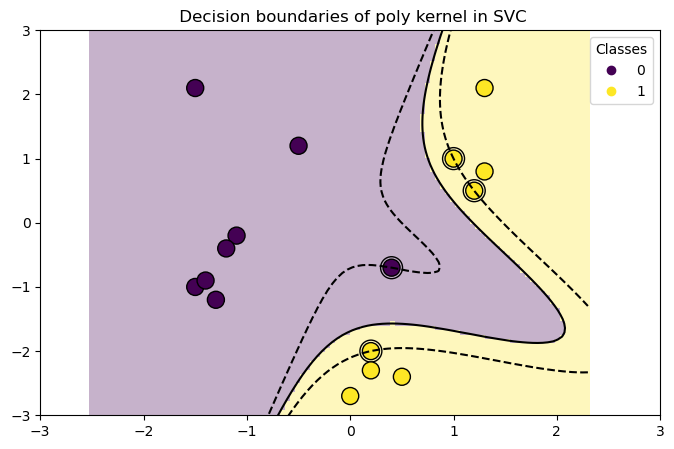

In [11]:
plot_training_data_with_decision_boundary("poly")

### 8.1.4 - Non linear kernels: RBF

The radial basis function (RBF) kernel, also known as the Gaussian kernel, is the default kernel for Support Vector Machines in scikit-learn. It measures similarity between two data points in infinite dimensions and then approaches classification by majority vote. The kernel function is defined as:

$$K(\mathbf{x_1},\mathbf{x_2})=exp(-\gamma \cdot \lVert \mathbf{x_1} - \mathbf{x_2} \rVert^2)$$

where $\gamma$ (`gamma`) controls the influence of each individual training sample on the decision boundary.

The larger the euclidean distance between two points $\lVert \mathbf{x_1} - \mathbf{x_2} \rVert^2$ the closer the kernel function is to zero. This means that two points close together are more similar than two points far away.

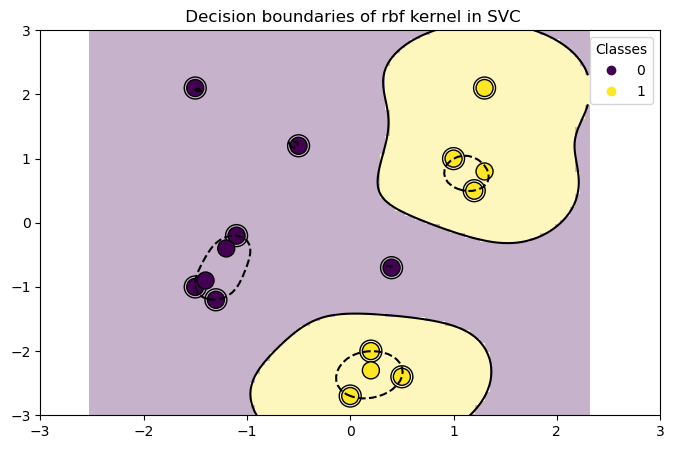

In [12]:
plot_training_data_with_decision_boundary("rbf")

### 8.1.5 - Non linear kernels: Sigmoid

The sigmoid kernel function is defined as:

$$K(\mathbf{x_1},\mathbf{x_2})=tanh(\gamma \cdot \mathbf{x_1}^T\mathbf{x_2} +r )$$
    
where the kernel coefficient $gamma$ (`gamma`) controls the influence of each individual training sample on the decision boundary and $r$ is the bias term (`coef0`) that shifts the data up or down.

In the sigmoid kernel, the similarity between two data points is computed using the hyperbolic tangent function ($tanh$). The kernel function scales and possibly shifts the dot product of the two points ($\mathbf{x_1}$ and $\mathbf{x_2}$).

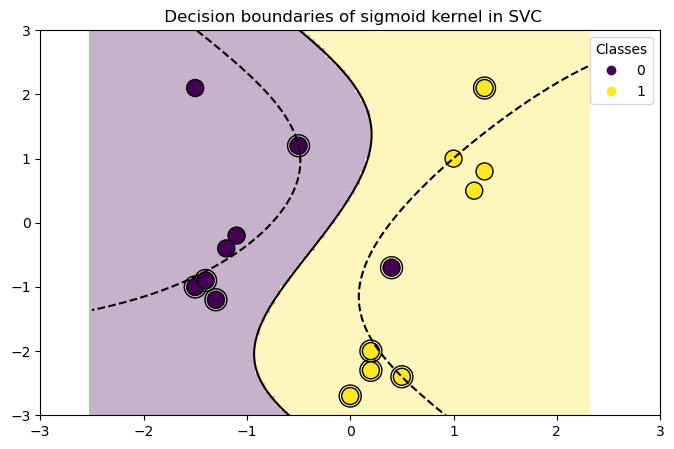

In [13]:
plot_training_data_with_decision_boundary("sigmoid", gamma = 0.3)

## 8.2 A more complex problem Image Classification

We can now try to solve a slightly more complex, and higher-dimensional problem.

The problem we will study is the classification of image patches into text or non-text. For this purpose, we have already extracted image patches, and we have already extracted features from them. The features we will be using are [Bag of Word](https://en.wikipedia.org/wiki/Bag-of-words_model_in_computer_vision) features - if you are interested in the procedure to extract them, see the separate notebook provided.

Note that in order to execute the code below, you need to have the .pklz files provided in the same folder as this notebook.

In [14]:
import pickle
import gzip
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# Load the images (patches)

with gzip.open('./raw_pixels_dataset_5980.pklz','rb') as f:
    (train_labels,train_images,test_labels,test_images) = pickle.load(f, encoding='latin1')

In [16]:
import pickle
import gzip

# Load the train and test datasets

with gzip.open('./BoW_train_features.pklz','rb') as f:
    (train_labels,train_features) = pickle.load(f)
    
with gzip.open('./BoW_test_features.pklz','rb') as f:
    (test_labels,test_features) = pickle.load(f)

Train_images shape (11960, 1024)
Test_images shape  (10396, 1024)


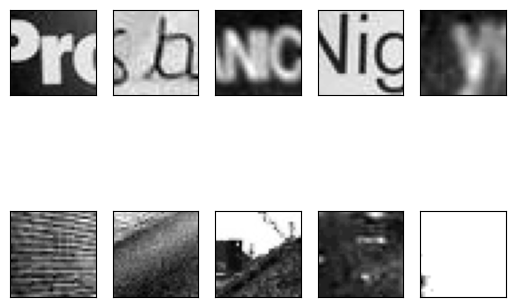

In [17]:
print("Train_images shape " + str(train_images.shape))
print("Test_images shape  " + str(test_images.shape))

# Show a few samples of the positive and negative classes.
train_class0=train_images[train_labels == 0]
num_class0 = train_class0.shape[0]
train_class1=train_images[train_labels == 1]
num_class1 = train_class1.shape[0]

fig = plt.figure()
for i in range(1,6):
    ax = fig.add_subplot(2, 5, i)
    ax.imshow(np.reshape(train_class1[np.random.randint(0,num_class1),:],[32,32]), cmap=plt.cm.gray)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = fig.add_subplot(2, 5, i+5)
    ax.imshow(np.reshape(train_class0[np.random.randint(0,num_class0),:],[32,32]), cmap=plt.cm.gray)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

### 8.2.1 Logistic Regression classification

Train a Logistic Regression classifier with the given image features.

In [18]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, max_iter = 10000)
clf.fit(train_features, train_labels)

LogisticRegression(max_iter=10000, random_state=0)

Calculate the Test Accuracy

In [19]:
score = clf.score(test_features, test_labels)
print(score)

0.8543670642554829


We will create a dictionary to save the results of the different classifiers we try

In [20]:
results = {}
results["Logistic Regression"] = score

<font color=blue>Calculate and show the [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) of your classifier</font>

In [21]:
# Your Code Here



Show a few random examples, along with the predicted label

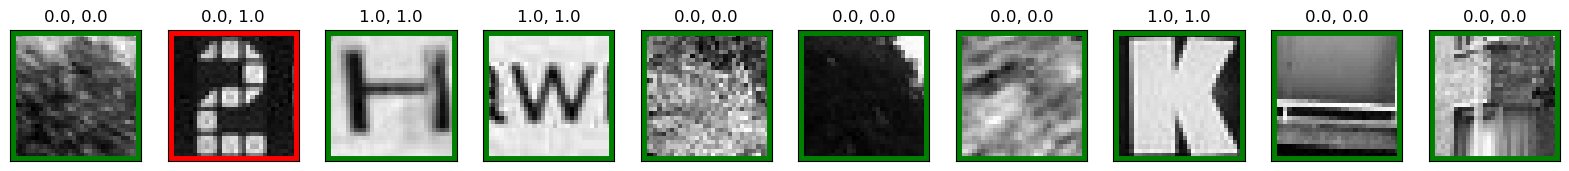

In [22]:
import matplotlib.patches as patches

nImages = 10 # We will display nImages

fig, axs = plt.subplots(1, nImages, figsize = (2 * nImages, 2))

# Choose nImages random indices from the test set, and then pass the corresponding images through our model
idxs = np.random.randint(0, test_images.shape[0], size = nImages)
y_pred = clf.predict(test_features[idxs])

# Draw
for ax, i, o in zip(axs, idxs, y_pred):
    ax.imshow(np.reshape(test_images[i, :],[32,32]), cmap=plt.cm.gray)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("{}, {}".format(o, test_labels[i]))
    rect = patches.Rectangle((0, 0), 31, 31, linewidth=5, edgecolor=("green" if o == test_labels[i] else "red"), facecolor= "none")
    ax.add_patch(rect)

### 8.2.2 k-NN Classification

Now do the same with a K-NN classifier with the given image features and $k = 5$.

In [23]:
from sklearn.neighbors import KNeighborsClassifier

<font color=blue>Calculate the Test Accuracy, and show the confusion matrix</font>

In [24]:
# Your Code Here



<font color=blue>Now do the same using different values of k for your k-NN classifier. Try for $k \in {1, 5, 10, 100, 200}$ and save the results in the `results` dictionary we created before. You can change the number of nearest neighbours using the function `set_params(n_neighbors = X)`. Fill in the following table with your results.</font>

In [25]:
# Your Code Here



Show a few random examples, along with the predicted label

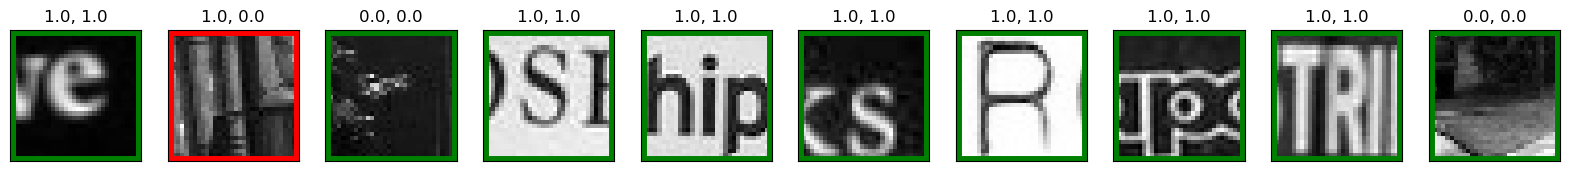

In [26]:
import matplotlib.patches as patches

nImages = 10 # We will display nImages

fig, axs = plt.subplots(1, nImages, figsize = (2 * nImages, 2))

# Choose nImages random indices from the test set, and then pass the corresponding images through our model
idxs = np.random.randint(0, test_images.shape[0], size = nImages)
out = clf.predict(test_features[idxs])

# Draw
for ax, i, o in zip(axs, idxs, out):
    ax.imshow(np.reshape(test_images[i, :],[32,32]), cmap=plt.cm.gray)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("{}, {}".format(o, test_labels[i]))
    rect = patches.Rectangle((0, 0), 31, 31, linewidth=5, edgecolor=("green" if o == test_labels[i] else "red"), facecolor= "none")
    ax.add_patch(rect)

### 8.2.3 Linear SVM Classification

<font color=blue>Train a linear SVM classifier for text/non-text classification with the given image features.</font>

In [27]:
# Your Code Here



### 8.2.4 Grid search for the parameters

The effectiveness of SVM depends on the selection of kernel, the kernel's parameters (if any), and the soft margin parameter C.

The best value for the soft margin parameter C is often picked with an exhaustive search strategy, for example, checking all possible values $C \in \{ 2^{-5}, 2^{-3}, \dots, 2^{13},2^{15} \}$. 

`sklearn.model_selection.GridSearchCV` performs a [grid search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) over specified parameter values for an estimator. In our case, we will use it with an `svm.SVC` classifier to find the best value for the soft margin parameter C.

The Grid Search class implements the `fit()` and `predict()` methods like all sklearn classifiers, except that the parameters of the classifier used to predict is optimized by cross-validation. Each possible combination of parameter choices is checked using cross validation, and the parameters with best cross-validation accuracy are picked. 

*Note: If you are going to check a large number of parameter combinations `GridSearchCV` is going to take a long time to finish. By setting the `verbose` parameter equal to $10$ you will be able to see intermediate results, and select the best ones even if the search has not finished:*

In [28]:
# Grid search for SVM parameter C
from sklearn.model_selection import GridSearchCV

parameters = {'C':[0.1, 1, 10]} # Checking only three possible values for the C parameter
clf = svm.SVC(kernel='linear') # Linear kernel
grid = GridSearchCV(clf, parameters, verbose=10)
grid.fit(train_features, train_labels)

print("The best parameters are {} with a score of {:0.2f}".format(grid.best_params_, grid.best_score_))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5; 1/3] START C=0.1.......................................................
[CV 1/5; 1/3] END ........................C=0.1;, score=0.872 total time=   3.2s
[CV 2/5; 1/3] START C=0.1.......................................................
[CV 2/5; 1/3] END ........................C=0.1;, score=0.870 total time=   2.9s
[CV 3/5; 1/3] START C=0.1.......................................................
[CV 3/5; 1/3] END ........................C=0.1;, score=0.882 total time=   3.5s
[CV 4/5; 1/3] START C=0.1.......................................................
[CV 4/5; 1/3] END ........................C=0.1;, score=0.862 total time=   3.1s
[CV 5/5; 1/3] START C=0.1.......................................................
[CV 5/5; 1/3] END ........................C=0.1;, score=0.864 total time=   3.2s
[CV 1/5; 2/3] START C=1.........................................................
[CV 1/5; 2/3] END ..........................C=1;,

<font color=blue>Calculate the Test Accuracy using the best value for C</font>

In [29]:
# Your Code Here



### 8.2.5 Non-Linear SVM Classification

We can now try other possible Kernels, and search for the best parameters

<font color=blue>Repeat the process with a Radial Basis Function (RBF) kernel. Read the [sklearn documentation](https://scikit-learn.org/stable/modules/svm.html) for details.</font>

In [30]:
# YOUR CODE HERE



<font color=blue>Do a grid search for different values of C and $\gamma$, for example $C \in \{0.1, 1, 10\}$; $\gamma \in \{0.01, 0.1, 1\}$, then use the best parameters to retrain your classifier. </font>

In [31]:
# Your Code Here



<font color=blue>Repeat the exercise with the polynomial kernel, trying different values for $C$ and for the degree $d$, and add your result to the table.</font>

In [32]:
# Your Code Here



In [33]:
for classifier in results:
    print(f'{classifier}:\t{results[classifier]}')

Logistic Regression:	0.8543670642554829


### 8.2.6 Exploring more kernels

In the scikit-learn SVM implementation, the kernel function can be any of the following:

* 'linear'     : Linear kernel, $k(x,y) = x^T y$, it has no parameters
* 'poly'       : Polynomial kernel, $k(x,y) = (\gamma x^T y + r)^d$, where $d$ is the degree specified by the parameter `degree`, and $r$ is an independent term specificed by the parameter `coef0`
* 'rbf'        : Radial Basis Function kernel. $k(x, y) = \exp{(- \gamma \lVert x-y \rVert ^2 )}$, it has one parameter: 'gamma' specified by the parameter `gamma`
* 'sigmoid'    : A sigmoid shaped function, $k(x,y) = tanh(\gamma (x^T y) + r)$, where $\gamma$ is specified by `gamma` and $r$ is an independent term specificed by the parameter `coef0`
* 'precomputed': Allows you to pass to the function pre-computed kernels. You should then pass the Gram matrix instead of X to the fit and predict methods.
* or callable  : You can define your own python function to call

Apart from the pre-defined kernels in scikit learn we can create a classifier with our own custom kernel by giving the kernel as a python function. In the following list you have some kernel functions that are commonly used:

###  Chi-Square Kernels

The Chi-Square kernel comes from the Chi-Square distribution. This kernel is most commonly applied to histograms.

$k(x,y) = 1 - \sum_{i=1}^n \frac{(x_i-y_i)^2}{\frac{1}{2}(x_i+y_i)}$

Appart of the normal Chi-Square kernel, other popular definitions of Chi Squared kernels include the normalized Chi-Square kernel:

$k(x,y) = \sum_{i=1}^n \frac{(x_i*y_i)}{(x_i+y_i)}$

and the exponential Chi-Squared kernel:

$k(x,y) = \exp{(-\gamma \sum_{i=1}^n \frac{(x_i-y_i)^2}{(x_i+y_i)})}$



### Histogram Intersection Kernel

The Histogram Intersection Kernel is also known as the Min Kernel and has been proven useful in image classification.

$k(x,y) = \sum_{i=1}^n min(x_i,y_i)$



### Generalized Histogram Intersection

The Generalized Histogram Intersection kernel is built based on the Histogram Intersection Kernel for image classification but applies in a much larger variety of contexts (Boughorbel, 2005). It is given by:

$k(x,y) = \sum_{i=1}^m min(|x_i|^\alpha,|y_i|^\beta)$


The following cell of code shows how to make use of a python function as a custom kernel in `svm.SVC`. In this case it implements the Linear kernel.

In [34]:
import numpy as np
from sklearn import svm

def my_kernel(x, y): 
    return np.dot(x, y.T) #Linear kernel (dot product)

classifier = svm.SVC(kernel=my_kernel)

classifier = classifier.fit(train_features, train_labels)

print( "Train Accuracy : " + str(classifier.score(train_features, train_labels)))

Train Accuracy : 0.8767558528428093


<font color='blue'>[OPTIONAL] Select one of the kernel functions listed above and implement it as a Python function. Then calculate the performance with your selected kernel and add it in our results dictionary</font>

*Note: Training and testing the classifier with your own kernel function may be very slow if the kernel function is not vectorized.*

In [35]:
# Your Code Here

